# Infopillar Solution

# Name- Pratibha Rakhama Antre

# Task 3 -Iris Flowers Classification Project

# DataSet - https://archive.ics.uci.edu/ml/datasets/Iris

# Project idea – The iris flowers have different species and you can distinguish them based on the length of petals and sepals.

# Import required libraries

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from sklearn import tree

# Load the dataset

In [2]:
iris=load_iris()

In [3]:
x=pd.DataFrame(iris.data,columns=iris.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y=pd.Categorical.from_codes(iris.target,iris.target_names)
y

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']

### Explore the dataset

In [5]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
x.shape

(150, 4)

In [9]:
y.shape

(150,)

In [10]:
y=pd.get_dummies(y)
y

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


# To divide the dataset into training & testing

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


In [17]:
prediction_model= DecisionTreeClassifier()

In [18]:
prediction_model.fit(x_train,y_train)

DecisionTreeClassifier()

# Do the prediction

In [20]:
y_pred=prediction_model.predict(x_test)
y_pred

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [21]:
y_test

,setosa,versicolor,virginica
132,0,0,1
121,0,0,1
57,0,1,0
79,0,1,0
81,0,1,0
85,0,1,0
45,1,0,0
65,0,1,0
39,1,0,0
120,0,0,1


# To evaluate the model

In [22]:
species=np.array(y_test).argmax(axis=1)

pred=np.array(y_pred).argmax(axis=1)

confusion_matrix(species,pred)

array([[ 7,  0,  0],
       [ 0, 12,  2],
       [ 0,  0,  9]])

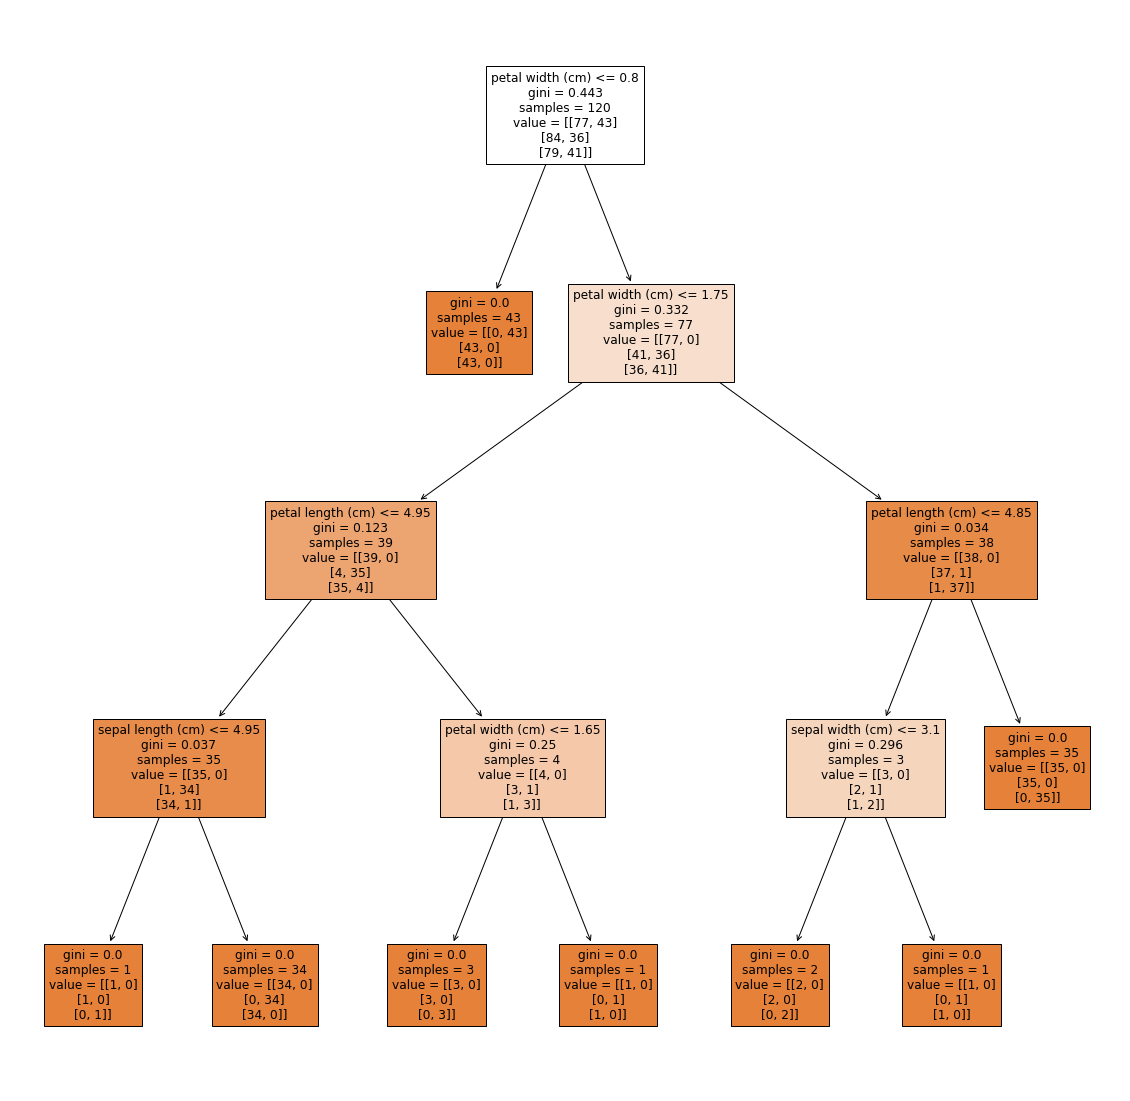

In [23]:
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(
    prediction_model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)